<a href="https://colab.research.google.com/github/kj1103/cwiczenia1/blob/main/nr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresja z podziałem na zbiór treningowy oraz testowy


In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_train shape: (750,)


[]

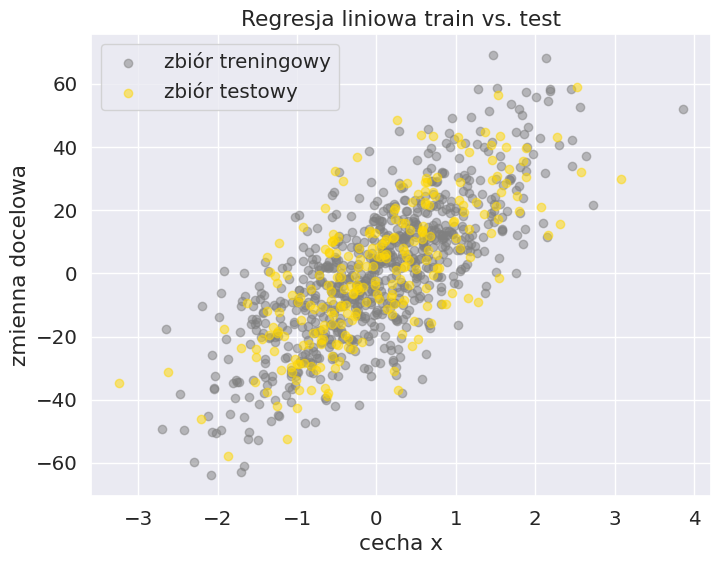

In [6]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa train vs. test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.legend()
plt.plot()


In [13]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
regressor.score(X_train, y_train)
regressor.score(X_test, y_test)

0.5108438585354155

[]

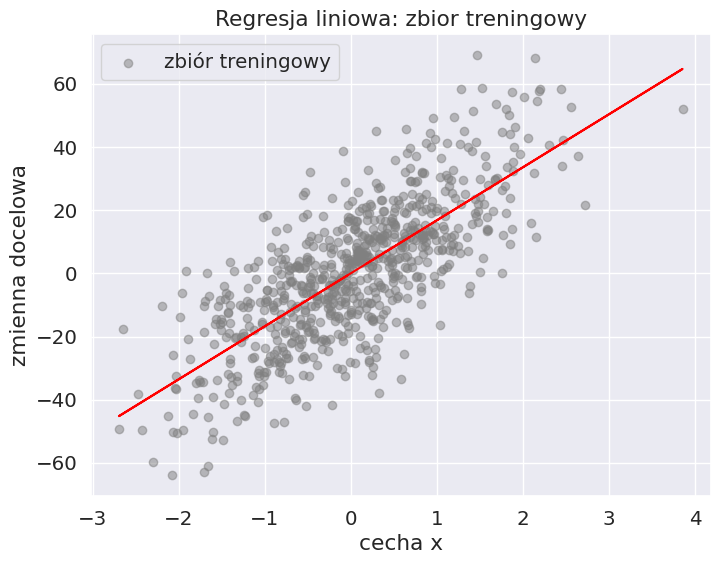

In [15]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior treningowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label='zbiór treningowy', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red')
plt.legend()
plt.plot()


[]

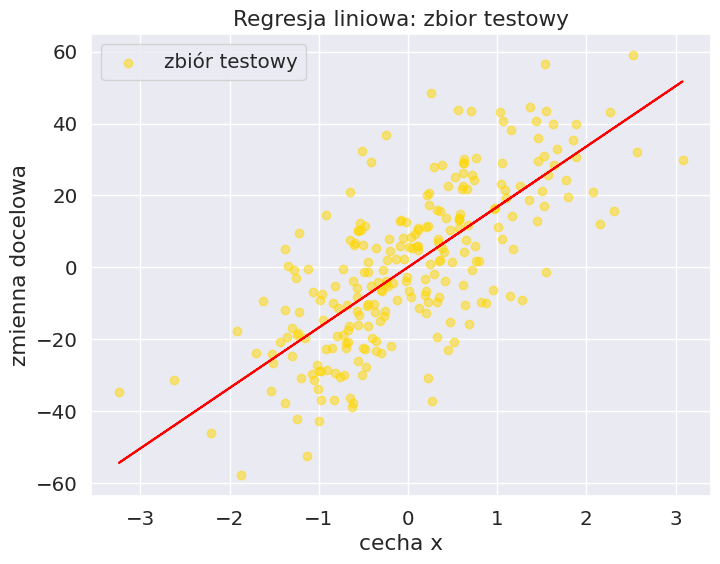

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior testowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label='zbiór testowy', color='gold', alpha=0.5)
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, color='red')
plt.legend()
plt.plot()

In [17]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,30.876983,25.601338
1,1.850537,5.954600
2,30.604981,31.624589
3,-9.092543,-16.490844
4,-36.311708,-10.800495


In [18]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,30.876983,25.601338,5.275646
1,1.850537,5.954600,-4.104063
2,30.604981,31.624589,-1.019608
3,-9.092543,-16.490844,7.398301
4,-36.311708,-10.800495,-25.511212


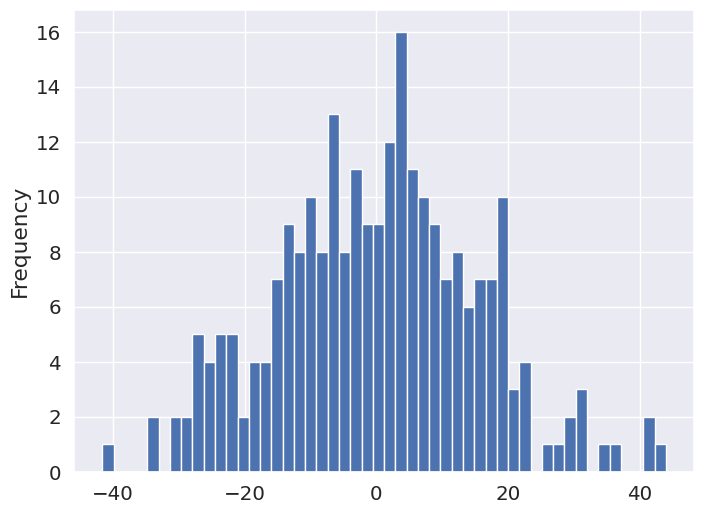

In [19]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8, 6))


MODELOWANIE 1

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)
sklearn.__version__

'1.5.2'

In [21]:
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [24]:
df[df['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [25]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [26]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O'] ### zwróci wszystkie kolumny jeśli typ tej kolumny to object [0]
cat_cols

['sex', 'smoker', 'region']

In [28]:
for col in cat_cols:
    df[col] = df[col].astype('category') ##zmieniamy typ na category
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


In [30]:
df.describe(include=['category']).T
df.isnull().sum()  # braki danych

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [31]:
df.sex.value_counts()

,count
sex,
male,675
female,662


In [32]:
import plotly.express as px

px.histogram(df, x='charges', width=700, height=400, nbins=50, facet_col='smoker', facet_row='sex')

In [36]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies
df_dummies = df_dummies.astype(int)
df_dummies


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0
1334,18,31,0,2205,0,0,0,0,0
1335,18,36,0,1629,0,0,0,1,0
1336,21,25,0,2007,0,0,0,0,1


In [37]:
corr = df_dummies.corr()
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.108491,0.041536,0.298309,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.108491,1.000000,0.011081,0.196236,0.046541,0.001659,-0.138620,0.271328,-0.004325
children,0.041536,0.011081,1.000000,0.067390,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298309,0.196236,0.067390,1.000000,0.058046,0.787234,-0.038695,0.073577,-0.043637
sex_male,-0.019814,0.046541,0.017848,0.058046,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.001659,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.138620,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.271328,-0.023492,0.073577,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.004325,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


<Axes: >

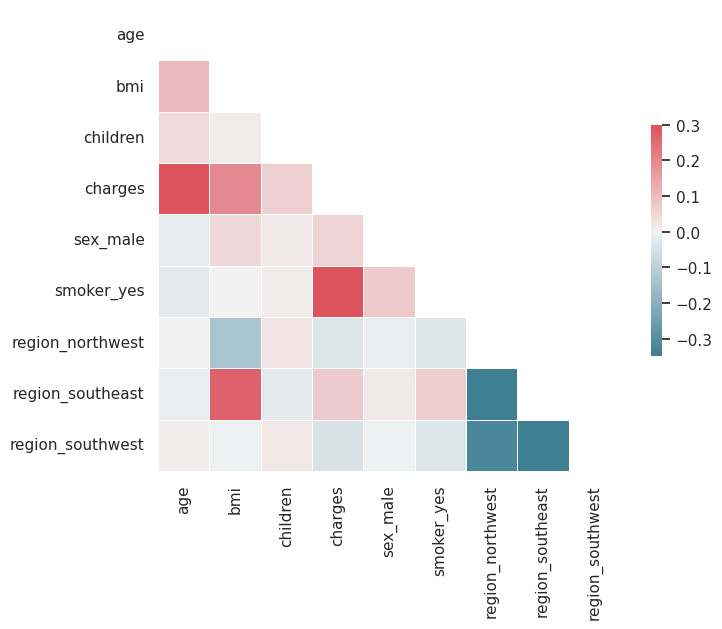

In [39]:
sns.set(style="white")
mask = np.zeros_like(corr, dtype=bool) # Changed np.bool to bool
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
df_dummies.corr()['charges'].sort_values(ascending=False)


,charges
charges,1.000000
smoker_yes,0.787234
age,0.298309
bmi,0.196236
region_southeast,0.073577
children,0.067390
sex_male,0.058046
region_northwest,-0.038695
region_southwest,-0.043637


<Axes: >

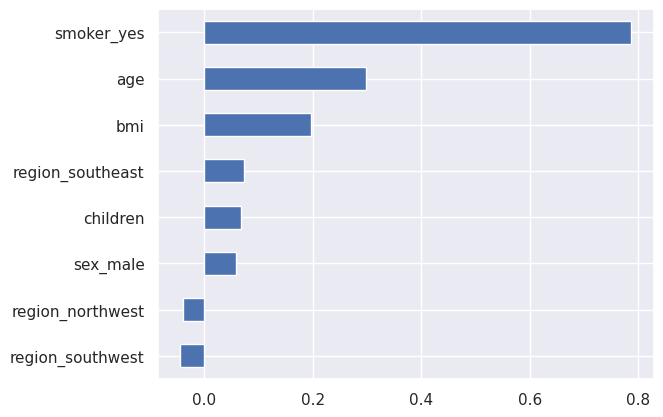

In [41]:
sns.set()
df_dummies.corr()['charges'].sort_values()[:-1].plot(kind='barh')

In [42]:
data = df_dummies.copy()
target = data.pop('charges')
data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_trian shape: (1069, 8)
X_test shape: (268, 8)
y_trian shape: (1069,)
y_test shape: (268,)


In [44]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
print(f'R2 score: {regressor.score(X_test, y_test):.4f}')
y_pred = regressor.predict(X_test)
y_pred[:10]

R2 score: 0.8069


array([ 8149.7234,  5696.4963, 14411.1591, 31793.6989,  8978.6461, 13132.3257, 30395.5845,  1502.2612, 10573.1649,
       11271.8808])

In [47]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] -  predictions['y_pred']
predictions.head()

,y_true,y_pred,error
900,8688,8149.723413,538.276587
1064,5708,5696.496322,11.503678
1256,11436,14411.159132,-2975.159132
298,38746,31793.698864,6952.301136
237,4463,8978.646086,-4515.646086


In [49]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE wynosi: {mae:.2f}')

MAE wynosi: 4171.80


In [50]:
regressor.intercept_

-10910.071093903349

In [51]:
regressor.coef_

array([  248.4086,   317.6745,   534.4252,  -101.0649, 23087.1249,  -387.1653,  -851.3662,  -676.845 ])

In [52]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)
X_train_ols

array([[ 1., 23., 24.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1., 21., 25.,  2.,  1.,  0.,  0.,  0.,  0.],
       [ 1., 52., 37.,  2.,  0.,  0.,  1.,  0.,  0.],
       [ 1., 63., 41.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 1., 47., 26.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 41., 32.,  3.,  0.,  0.,  0.,  0.,  1.],
       [ 1., 40., 41.,  1.,  1.,  0.,  0.,  0.,  0.],
       [ 1., 60., 27.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 34., 22.,  2.,  1.,  0.,  0.,  0.,  0.],
       [ 1., 57., 20.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 1., 28., 17.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 64., 39.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 26., 27.,  3.,  1.,  0.,  0.,  0.,  0.],
       [ 1., 31., 32.,  2.,  0.,  0.,  1.,  0.,  0.],
       [ 1., 51., 33.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 25., 26.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1., 51., 37.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 1., 57., 25.,  2.,  0.,  0.,  0.,  1.,  0.],
       [ 1., 30., 27.,  1., 

In [53]:
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     358.0
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          5.30e-295
Time:                        13:35:52   Log-Likelihood:                -10831.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1060   BIC:                         2.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.091e+04   1100.397  

In [54]:
X_selected = X_train_ols[:, [0, 1, 2, 3, 5, 6, 7, 8]]
predictors.remove('sex_male')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     409.5
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.62e-296
Time:                        14:04:42   Log-Likelihood:                -10831.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1061   BIC:                         2.172e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.095e+04   1088.657  

In [55]:
X_train_numpy = X_train.values
X_train_numpy = sm.add_constant(X_train_numpy)
num_vars = len(X_train_numpy[0])

predictors = ['const'] + list(X_train.columns)
sl = 0.05

for i in range(0, num_vars):
    ols = sm.OLS(endog=y_train, exog=X_train_numpy).fit()
    max_pval = max(ols.pvalues.astype('float'))
    if max_pval > sl:
        for j in range(0, num_vars - i):
            if ols.pvalues[j].astype('float') == max_pval:
                X_train_numpy = np.delete(X_train_numpy, j, axis=1)
                predictors.remove(predictors[j])

print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     716.1
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          6.30e-300
Time:                        14:07:01   Log-Likelihood:                -10832.
No. Observations:                1069   AIC:                         2.167e+04
Df Residuals:                    1064   BIC:                         2.170e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.108e+04   1047.722    -10.571      0.0

<ipython-input-55-0500c0420b6c>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-55-0500c0420b6c>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-55-0500c0420b6c>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-55-0500c0420b6c>:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

In [56]:
ols.save('model')